<a href="https://colab.research.google.com/github/Serurays/Biomedical_Image_Analysis/blob/main/Biomedical_Image_Analysis_Part7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

i1 = imageio.imread("brain_normal.jpg")

i1_gray = np.dot(i1[..., :3], [0.2989, 0.5870, 0.1140])

i2 = imageio.imread("transformed.jpg")

i2_gray = np.dot(i2[..., :3], [0.2989, 0.5870, 0.1140])

err = i1_gray - i2_gray

abs_err = np.abs(err)

mae = np.mean(abs_err)
print("Mean Absolute Error (MAE):", mae)

fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(i1_gray, cmap="gray")
axes[0, 0].axis("off")
axes[0, 0].set_title("Brain Normal Gray")

axes[0, 1].imshow(i2_gray, cmap="gray")
axes[0, 1].axis("off")
axes[0, 1].set_title("Augmented Brain Gray")

axes[1, 0].imshow(err, cmap="gray")
axes[1, 0].axis("off")
axes[1, 0].set_title("Error")

axes[1, 1].imshow(abs_err, cmap="gray")
axes[1, 1].axis("off")
axes[1, 1].set_title("Absolute Error")

plt.show()

FileNotFoundError: No such file: '/content/brain_normal.jpg'

Mean Absolute Error after Transforming (MAE): 23.31230140642035


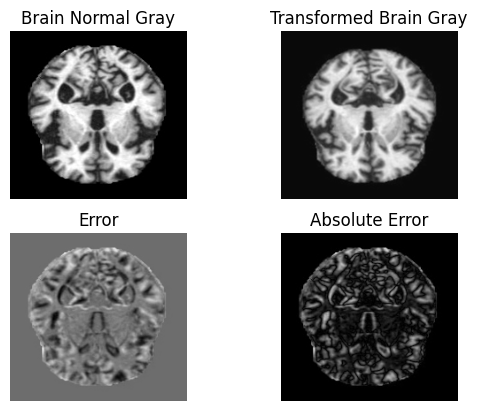

In [ ]:
import scipy.ndimage as ndi

rotated = ndi.rotate(i2_gray, angle=-10, reshape=False)

com = ndi.center_of_mass(rotated)

d0 = rotated.shape[0] / 2 - com[0]
d1 = rotated.shape[1] / 2 - com[1]

shifted = ndi.shift(rotated, shift=[d0, d1])

err = i1_gray - shifted

abs_err = np.abs(err)

mae = np.mean(abs_err)
print("Mean Absolute Error after Transforming (MAE):", mae)

fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(i1_gray, cmap="gray")
axes[0, 0].axis("off")
axes[0, 0].set_title("Brain Normal Gray")

axes[0, 1].imshow(shifted, cmap="gray")
axes[0, 1].axis("off")
axes[0, 1].set_title("Transformed Brain Gray")

axes[1, 0].imshow(err, cmap="gray")
axes[1, 0].axis("off")
axes[1, 0].set_title("Error")

axes[1, 1].imshow(abs_err, cmap="gray")
axes[1, 1].axis("off")
axes[1, 1].set_title("Absolute Error")

plt.show()

In [ ]:
def intersection_of_union(im1, im2):
  i = np.logical_and(im1, im2)
  u = np.logical_or(im1, im2)
  return i.sum() / u.sum()

Intersection: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Union: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Intersection of Union (IoU): 0.5628638267776508


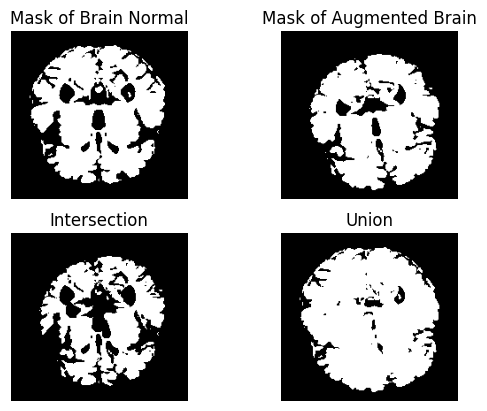

In [ ]:
mask1 = i1_gray > 80
mask2 = i2_gray > 80

intersection = mask1 & mask2
print("Intersection:", intersection)

union = mask1 | mask2
print("Union:", union)

iou = intersection.sum() / union.sum()
print("Intersection of Union (IoU):", iou)

fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(mask1, cmap="gray")
axes[0, 0].axis("off")
axes[0, 0].set_title("Mask of Brain Normal")

axes[0, 1].imshow(mask2, cmap="gray")
axes[0, 1].axis("off")
axes[0, 1].set_title("Mask of Augmented Brain")

axes[1, 0].imshow(intersection, cmap="gray")
axes[1, 0].axis("off")
axes[1, 0].set_title("Intersection")

axes[1, 1].imshow(union, cmap="gray")
axes[1, 1].axis("off")
axes[1, 1].set_title("Union")

plt.show()

Intersection: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Union: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Intersection of Union (IoU): 0.7316705825652148


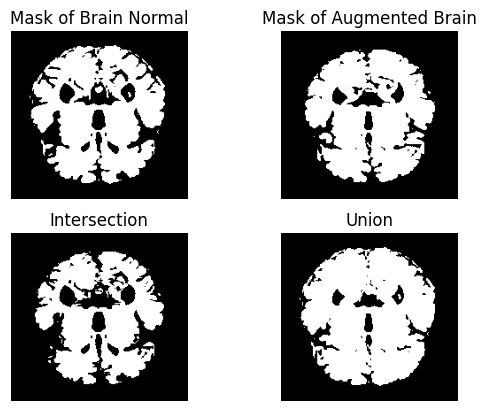

In [ ]:
mask1 = i1_gray > 80
mask2 = shifted > 80

intersection = mask1 & mask2
print("Intersection:", intersection)

union = mask1 | mask2
print("Union:", union)

iou = intersection.sum() / union.sum()
print("Intersection of Union (IoU):", iou)

fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(mask1, cmap="gray")
axes[0, 0].axis("off")
axes[0, 0].set_title("Mask of Brain Normal")

axes[0, 1].imshow(mask2, cmap="gray")
axes[0, 1].axis("off")
axes[0, 1].set_title("Mask of Augmented Brain")

axes[1, 0].imshow(intersection, cmap="gray")
axes[1, 0].axis("off")
axes[1, 0].set_title("Intersection")

axes[1, 1].imshow(union, cmap="gray")
axes[1, 1].axis("off")
axes[1, 1].set_title("Union")

plt.show()

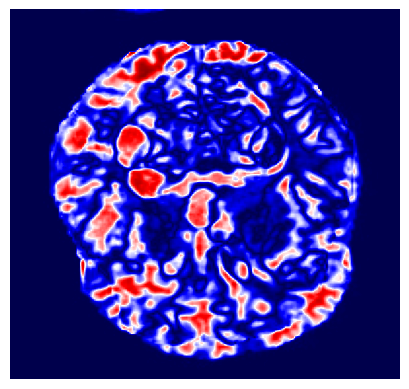

In [ ]:
abs_err = np.abs(i1_gray - i2_gray)

plt.imshow(abs_err, cmap="seismic")
plt.axis("off")
plt.show()

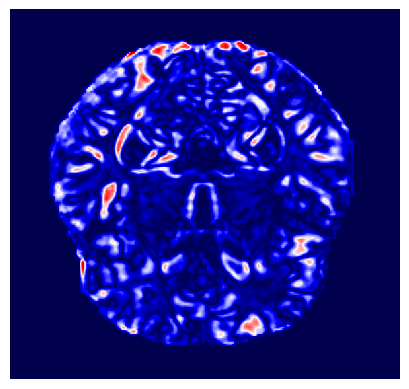

In [ ]:
abs_err = np.abs(i1_gray - shifted)

plt.imshow(abs_err, cmap="seismic")
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import os

import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/body-fat-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 7.43k/7.43k [00:00<00:00, 3.44MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/body-fat-prediction-dataset/versions/1


In [ ]:
os.listdir("/root/.cache/kagglehub/datasets/fedesoriano/body-fat-prediction-dataset/versions/1")

['bodyfat.csv']

In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/fedesoriano/body-fat-prediction-dataset/versions/1/bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df["Age Group"] = np.where(df["Age"] < 30, "Younger", "Older")
df["Norm_Abdomen"] = df["Abdomen"] / df["Weight"]

In [ ]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Age Group,Norm_Abdomen
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,Younger,0.552350
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,Younger,0.479076
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,Younger,0.570779
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,Younger,0.467659
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,Younger,0.542741


In [ ]:
correlation = df[["Abdomen", "Weight"]].corr().iloc[0, 1]
print(f"Correlation between Abdomen and Weight: {correlation:.2f}")

Correlation between Abdomen and Weight: 0.89


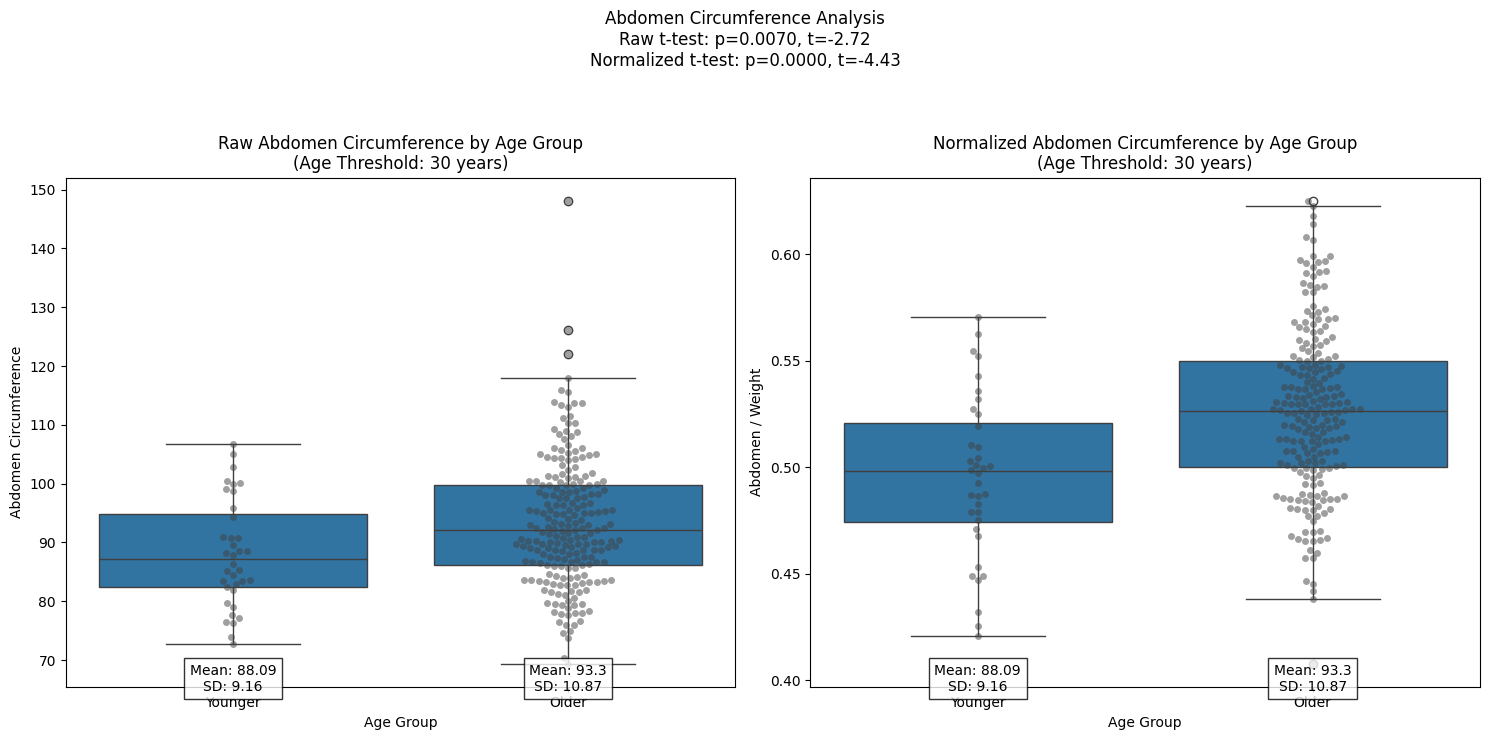


Detailed Statistics:

Raw Abdomen Measurements:
            mean    std
Age Group              
Older      93.30  10.87
Younger    88.09   9.16

Normalized Abdomen Measurements:
           mean   std
Age Group            
Older      0.53  0.04
Younger    0.50  0.04

Group Sizes:
Age Group
Older      216
Younger     36
Name: count, dtype: int64


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(x="Age Group", y="Abdomen", data=df, ax=ax1)
sns.swarmplot(x="Age Group", y="Abdomen", data=df, color=".25", alpha=0.5, ax=ax1)

stats_raw = df.groupby("Age Group")["Abdomen"].agg(["mean", "std"]).round(2)

for i, group in enumerate(["Younger", "Older"]):
  stats_text = f"Mean: {stats_raw.loc[group, 'mean']}\nSD: {stats_raw.loc[group, 'std']}"
  ax1.text(i, df["Abdomen"].min(), stats_text,
           horizontalalignment="center", verticalalignment="top",
           bbox=dict(facecolor="white", alpha=0.8))

ax1.set_title("Raw Abdomen Circumference by Age Group\n(Age Threshold: 30 years)")
ax1.set_ylabel("Abdomen Circumference")

sns.boxplot(x="Age Group", y="Norm_Abdomen", data=df, ax=ax2)
sns.swarmplot(x="Age Group", y="Norm_Abdomen", data=df, color=".25", alpha=0.5, ax=ax2)

stats_norm = df.groupby("Age Group")["Norm_Abdomen"].agg(["mean", "std"]).round(2)

for i, group in enumerate(["Younger", "Older"]):
  stats_text = f"Mean: {stats_raw.loc[group, 'mean']}\nSD: {stats_raw.loc[group, 'std']}"
  ax2.text(i, df["Norm_Abdomen"].min(), stats_text,
           horizontalalignment="center", verticalalignment="top",
           bbox=dict(facecolor="white", alpha=0.8))

ax2.set_title("Normalized Abdomen Circumference by Age Group\n(Age Threshold: 30 years)")
ax2.set_ylabel("Abdomen / Weight")

raw_ttest = ttest_ind(df[df["Age Group"] == "Younger"]["Abdomen"],
                      df[df["Age Group"] == "Older"]["Abdomen"])

norm_ttest = ttest_ind(df[df["Age Group"] == "Younger"]["Norm_Abdomen"],
                      df[df["Age Group"] == "Older"]["Norm_Abdomen"])

fig.suptitle("Abdomen Circumference Analysis\n" +
             f"Raw t-test: p={raw_ttest.pvalue:.4f}, t={raw_ttest.statistic:.2f}\n" +
             f"Normalized t-test: p={norm_ttest.pvalue:.4f}, t={norm_ttest.statistic:.2f}",
             y=1.05)

plt.tight_layout()
plt.show()

print("\nDetailed Statistics:")
print("\nRaw Abdomen Measurements:")
print(stats_raw)
print("\nNormalized Abdomen Measurements:")
print(stats_norm)

print("\nGroup Sizes:")
print(df["Age Group"].value_counts())